In [1]:
!pip install pandas_datareader 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import date

In [3]:
start='2012-01-01'
today= date.today()
end= today.strftime("%Y-%m-%d")
company= 'MRF.NS'
finance= 'yahoo'
df=data.DataReader(company,finance,start,end)
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,7040.000000,6871.100098,6980.0,6943.049805,4210.0,6829.999512
2012-01-03,7130.000000,6950.000000,6950.0,7069.049805,12459.0,6953.948242
2012-01-04,7100.000000,6981.000000,7090.0,7011.500000,3368.0,6897.334961
2012-01-05,7087.549805,6915.000000,7021.0,6956.850098,15716.0,6843.575195
2012-01-06,6999.000000,6891.000000,6930.0,6957.750000,2814.0,6844.459961


In [4]:
df.describe().dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [5]:
company= 'MRF.NS'
finance= 'yahoo'
print('Company name is '+ company)
print('Finance name is '+ finance)

Company name is MRF.NS
Finance name is yahoo


In [6]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-14,77863.453125,76532.296875,77399.796875,77414.898438,6630.0,77414.898438
2022-07-15,79729.648438,77629.546875,77724.000000,79558.101562,14260.0,79558.101562
2022-07-18,80998.953125,79600.000000,79602.000000,80742.500000,15460.0,80742.500000
2022-07-19,80820.898438,79191.546875,80500.000000,79941.796875,8431.0,79941.796875
2022-07-20,80618.851562,80008.148438,80075.000000,80271.601562,4931.0,80271.601562


In [7]:
df1=df.reset_index()['Close']

In [8]:
df1

0        6943.049805
1        7069.049805
2        7011.500000
3        6956.850098
4        6957.750000
            ...     
2597    77414.898438
2598    79558.101562
2599    80742.500000
2600    79941.796875
2601    80271.601562
Name: Close, Length: 2602, dtype: float64

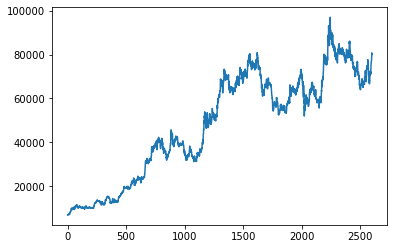

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

C:\Users\amazi\anaconda3\envs\STOCKCryptoFinalYearProject\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
print(df1)

[[0.00000000e+00]
 [1.39952103e-03]
 [7.60297520e-04]
 ...
 [8.19713351e-01]
 [8.10819693e-01]
 [8.14482936e-01]]


In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
df1[0:training_size,:]


array([[0.        ],
       [0.00139952],
       [0.0007603 ],
       ...,
       [0.65979699],
       [0.64711296],
       [0.65398838]])

In [14]:
training_size,test_size

(1691, 911)

In [15]:
train_data

array([[0.        ],
       [0.00139952],
       [0.0007603 ],
       ...,
       [0.65979699],
       [0.64711296],
       [0.65398838]])

In [16]:
test_data

array([[0.6509206 ],
       [0.65357412],
       [0.65324203],
       [0.65807752],
       [0.65623545],
       [0.67067217],
       [0.67381771],
       [0.68038603],
       [0.68456794],
       [0.68697822],
       [0.68139845],
       [0.67075929],
       [0.66365955],
       [0.6573939 ],
       [0.648011  ],
       [0.6422441 ],
       [0.65124158],
       [0.63779896],
       [0.657871  ],
       [0.6798062 ],
       [0.67221991],
       [0.65968531],
       [0.66013073],
       [0.6733079 ],
       [0.69291734],
       [0.68983783],
       [0.66711393],
       [0.65727059],
       [0.67062158],
       [0.66358736],
       [0.6674816 ],
       [0.66690124],
       [0.66486305],
       [0.66302253],
       [0.66505239],
       [0.66266319],
       [0.66683286],
       [0.66084993],
       [0.65674525],
       [0.66374676],
       [0.66637416],
       [0.66321743],
       [0.65813644],
       [0.65586613],
       [0.65377344],
       [0.65307368],
       [0.65736449],
       [0.647

In [17]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [18]:
train_data[0:100, 0]

array([0.        , 0.00139952, 0.0007603 , 0.00015328, 0.00016328,
       0.00034377, 0.00331664, 0.00297176, 0.00393921, 0.00353157,
       0.0031256 , 0.00376927, 0.0024064 , 0.00276294, 0.00189491,
       0.00262244, 0.0029029 , 0.00521822, 0.00498552, 0.00793507,
       0.01068246, 0.01485214, 0.01578904, 0.01376196, 0.01562132,
       0.01489157, 0.01708471, 0.01856087, 0.02597111, 0.02738452,
       0.02765887, 0.03214067, 0.030524  , 0.03142869, 0.03446432,
       0.02741451, 0.02935218, 0.02763276, 0.02617493, 0.03048346,
       0.03239003, 0.03126152, 0.03312034, 0.02987533, 0.02932385,
       0.02917613, 0.03193574, 0.03432214, 0.03652583, 0.03493804,
       0.03413832, 0.03217399, 0.03067118, 0.03061564, 0.04037396,
       0.03473256, 0.03279766, 0.03041459, 0.03245723, 0.03286931,
       0.03033018, 0.03320642, 0.03948982, 0.0377643 , 0.04126533,
       0.04454587, 0.0424427 , 0.04182735, 0.04196842, 0.04128642,
       0.04236162, 0.04486687, 0.04737878, 0.04928091, 0.04934

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
X_train

array([[0.00000000e+00, 1.39952103e-03, 7.60297520e-04, ...,
        4.00474052e-02, 4.32179889e-02, 4.40116084e-02],
       [1.39952103e-03, 7.60297520e-04, 1.53284128e-04, ...,
        4.32179889e-02, 4.40116084e-02, 4.55610781e-02],
       [7.60297520e-04, 1.53284128e-04, 1.63279622e-04, ...,
        4.40116084e-02, 4.55610781e-02, 4.27309378e-02],
       ...,
       [7.62379674e-01, 7.56463296e-01, 7.59812758e-01, ...,
        6.61304197e-01, 6.57672107e-01, 6.46641464e-01],
       [7.56463296e-01, 7.59812758e-01, 7.59829939e-01, ...,
        6.57672107e-01, 6.46641464e-01, 6.51131637e-01],
       [7.59812758e-01, 7.59829939e-01, 7.48818690e-01, ...,
        6.46641464e-01, 6.51131637e-01, 6.59796987e-01]])

In [21]:
y_train

array([0.04556108, 0.04273094, 0.04412213, ..., 0.65113164, 0.65979699,
       0.64711296])

In [22]:
print(X_train.shape)


(1590, 100)


In [23]:
print(y_train.shape)

(1590,)


In [24]:
print(X_test.shape)

(810, 100)


In [25]:
print(ytest.shape)

(810,)


In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
X_train

array([[[0.00000000e+00],
        [1.39952103e-03],
        [7.60297520e-04],
        ...,
        [4.00474052e-02],
        [4.32179889e-02],
        [4.40116084e-02]],

       [[1.39952103e-03],
        [7.60297520e-04],
        [1.53284128e-04],
        ...,
        [4.32179889e-02],
        [4.40116084e-02],
        [4.55610781e-02]],

       [[7.60297520e-04],
        [1.53284128e-04],
        [1.63279622e-04],
        ...,
        [4.40116084e-02],
        [4.55610781e-02],
        [4.27309378e-02]],

       ...,

       [[7.62379674e-01],
        [7.56463296e-01],
        [7.59812758e-01],
        ...,
        [6.61304197e-01],
        [6.57672107e-01],
        [6.46641464e-01]],

       [[7.56463296e-01],
        [7.59812758e-01],
        [7.59829939e-01],
        ...,
        [6.57672107e-01],
        [6.46641464e-01],
        [6.51131637e-01]],

       [[7.59812758e-01],
        [7.59829939e-01],
        [7.48818690e-01],
        ...,
        [6.46641464e-01],
        [6.5113

In [28]:
X_test

array([[[0.6509206 ],
        [0.65357412],
        [0.65324203],
        ...,
        [0.57733853],
        [0.56312005],
        [0.56146007]],

       [[0.65357412],
        [0.65324203],
        [0.65807752],
        ...,
        [0.56312005],
        [0.56146007],
        [0.56120625]],

       [[0.65324203],
        [0.65807752],
        [0.65623545],
        ...,
        [0.56146007],
        [0.56120625],
        [0.57283395]],

       ...,

       [[0.65195358],
        [0.64190919],
        [0.65340473],
        ...,
        [0.77441939],
        [0.78118487],
        [0.78275265]],

       [[0.64190919],
        [0.65340473],
        [0.65378238],
        ...,
        [0.78118487],
        [0.78275265],
        [0.80655787]],

       [[0.65340473],
        [0.65378238],
        [0.633145  ],
        ...,
        [0.78275265],
        [0.80655787],
        [0.81971335]]])

In [29]:
X_train.shape

(1590, 100, 1)

In [30]:
X_test.shape

(810, 100, 1)

In [31]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 22s 497ms/step - loss: 0.0297 - val_loss: 0.0032
Epoch 2/100
25/25 [==============================] - 8s 329ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 3/100
25/25 [==============================] - 8s 310ms/step - loss: 6.7036e-04 - val_loss: 0.0015
Epoch 4/100
25/25 [==============================] - 8s 336ms/step - loss: 5.8651e-04 - val_loss: 0.0013
Epoch 5/100
25/25 [==============================] - 8s 336ms/step - loss: 5.6060e-04 - val_loss: 0.0013
Epoch 6/100
25/25 [==============================] - 8s 336ms/step - loss: 5.6857e-04 - val_loss: 0.0015
Epoch 7/100
25/25 [==============================] - 8s 322ms/step - loss: 5.5763e-04 - val_loss: 0.0017
Epoch 8/100
25/25 [==============================] - 8s 329ms/step - loss: 5.8412e-04 - val_loss: 0.0015
Epoch 9/100
25/25 [==============================] - 8s 328ms/step - loss: 5.3628e-04 - val_loss: 0.0012
Epoch 10/100
25/25 [==============================] - 8s 337ms

25/25 [==============================] - 8s 339ms/step - loss: 1.8992e-04 - val_loss: 3.9445e-04
Epoch 77/100
25/25 [==============================] - 9s 354ms/step - loss: 1.7399e-04 - val_loss: 6.7006e-04
Epoch 78/100
25/25 [==============================] - 9s 354ms/step - loss: 1.8510e-04 - val_loss: 3.5772e-04
Epoch 79/100
25/25 [==============================] - 9s 354ms/step - loss: 1.5639e-04 - val_loss: 3.2192e-04
Epoch 80/100
25/25 [==============================] - 9s 350ms/step - loss: 1.9449e-04 - val_loss: 5.4667e-04
Epoch 81/100
25/25 [==============================] - 9s 352ms/step - loss: 1.7669e-04 - val_loss: 3.6288e-04
Epoch 82/100
25/25 [==============================] - 9s 358ms/step - loss: 1.7245e-04 - val_loss: 3.2548e-04
Epoch 83/100
25/25 [==============================] - 9s 354ms/step - loss: 1.5890e-04 - val_loss: 3.6837e-04
Epoch 84/100
25/25 [==============================] - 8s 341ms/step - loss: 1.7296e-04 - val_loss: 3.9595e-04
Epoch 85/100
25/25 [===

In [35]:
model.save('Stockp_predictor.h5')

In [36]:
import tensorflow as tf

In [37]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


26/26 [==============================] - 2s 69ms/step


In [38]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics


In [39]:
train_predict

array([[10817.445],
       [10929.554],
       [11022.484],
       ...,
       [65571.17 ],
       [65250.805],
       [65282.562]], dtype=float32)

In [40]:
train_predict.shape

(1590, 1)

In [41]:
test_predict

array([[57466.57 ],
       [56808.137],
       [56941.1  ],
       [57327.117],
       [57646.05 ],
       [57747.13 ],
       [57324.86 ],
       [56762.227],
       [56061.195],
       [55445.15 ],
       [54768.074],
       [53795.785],
       [52824.465],
       [52397.17 ],
       [52633.47 ],
       [52877.113],
       [53348.926],
       [53921.996],
       [54213.098],
       [53966.   ],
       [53561.91 ],
       [53312.375],
       [53269.76 ],
       [53539.234],
       [54005.11 ],
       [54415.902],
       [54756.918],
       [54863.8  ],
       [55481.41 ],
       [56186.1  ],
       [56518.477],
       [56356.613],
       [55762.504],
       [55175.21 ],
       [55044.77 ],
       [55648.57 ],
       [55952.24 ],
       [55854.516],
       [55600.605],
       [55572.363],
       [55546.727],
       [55212.566],
       [54787.016],
       [54483.01 ],
       [54321.62 ],
       [54244.297],
       [54361.086],
       [54553.02 ],
       [54633.176],
       [54893.684],


In [42]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

43994.05538966017

In [43]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

69486.24676777415

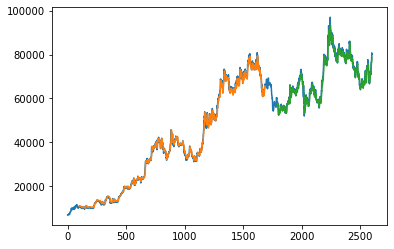

In [44]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
len(test_data)

911

In [46]:
test_data.shape

(911, 1)

In [47]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [49]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.80594426]
101
1 day input [0.6520952  0.65308652 0.65845023 0.65635763 0.65497858 0.65766438
 0.66034958 0.65693963 0.66575936 0.67704881 0.68231428 0.67912258
 0.68229319 0.688817   0.66569775 0.66814413 0.66534622 0.66394722
 0.66152973 0.65272771 0.64815596 0.64884292 0.64510202 0.66135314
 0.66851397 0.67546879 0.67407821 0.66828462 0.67576652 0.67557544
 0.67357673 0.67203941 0.66645972 0.659978   0.67451747 0.69722524
 0.69088357 0.69057309 0.71518246 0.72503968 0.72628092 0.73070492
 0.72924431 0.72125651 0.71352357 0.69943342 0.68459848 0.6871759
 0.67940807 0.67398041 0.72317304 0.72847678 0.74489729 0.75246024
 0.73854391 0.74598806 0.73800468 0.74921526 0.75397752 0.75660665
 0.75209595 0.76023978 0.78535792 0.77071901 0.76562405 0.7721502
 0.75273402 0.7188201  0.70765222 0.70512201 0.6998627  0.68438241
 0.68042491 0.68308459 0.66903272 0.67956184 0.66320077 0.6791953
 0.67862943 0.68935467 0.70653542 0.71396343 0.72559166 0.71731784
 0.7092889  0.72476581 0.72012469 0.

8 day output [[0.75373644]]
9 day input [0.66575936 0.67704881 0.68231428 0.67912258 0.68229319 0.688817
 0.66569775 0.66814413 0.66534622 0.66394722 0.66152973 0.65272771
 0.64815596 0.64884292 0.64510202 0.66135314 0.66851397 0.67546879
 0.67407821 0.66828462 0.67576652 0.67557544 0.67357673 0.67203941
 0.66645972 0.659978   0.67451747 0.69722524 0.69088357 0.69057309
 0.71518246 0.72503968 0.72628092 0.73070492 0.72924431 0.72125651
 0.71352357 0.69943342 0.68459848 0.6871759  0.67940807 0.67398041
 0.72317304 0.72847678 0.74489729 0.75246024 0.73854391 0.74598806
 0.73800468 0.74921526 0.75397752 0.75660665 0.75209595 0.76023978
 0.78535792 0.77071901 0.76562405 0.7721502  0.75273402 0.7188201
 0.70765222 0.70512201 0.6998627  0.68438241 0.68042491 0.68308459
 0.66903272 0.67956184 0.66320077 0.6791953  0.67862943 0.68935467
 0.70653542 0.71396343 0.72559166 0.71731784 0.7092889  0.72476581
 0.72012469 0.71395675 0.73627194 0.75968277 0.76753624 0.77121163
 0.77441939 0.78118487 0.

17 day output [[0.71749675]]
18 day input [0.66394722 0.66152973 0.65272771 0.64815596 0.64884292 0.64510202
 0.66135314 0.66851397 0.67546879 0.67407821 0.66828462 0.67576652
 0.67557544 0.67357673 0.67203941 0.66645972 0.659978   0.67451747
 0.69722524 0.69088357 0.69057309 0.71518246 0.72503968 0.72628092
 0.73070492 0.72924431 0.72125651 0.71352357 0.69943342 0.68459848
 0.6871759  0.67940807 0.67398041 0.72317304 0.72847678 0.74489729
 0.75246024 0.73854391 0.74598806 0.73800468 0.74921526 0.75397752
 0.75660665 0.75209595 0.76023978 0.78535792 0.77071901 0.76562405
 0.7721502  0.75273402 0.7188201  0.70765222 0.70512201 0.6998627
 0.68438241 0.68042491 0.68308459 0.66903272 0.67956184 0.66320077
 0.6791953  0.67862943 0.68935467 0.70653542 0.71396343 0.72559166
 0.71731784 0.7092889  0.72476581 0.72012469 0.71395675 0.73627194
 0.75968277 0.76753624 0.77121163 0.77441939 0.78118487 0.78275265
 0.80655787 0.81971335 0.81081969 0.81448294 0.80594426 0.80149561
 0.79466587 0.7872154

25 day output [[0.68732077]]
26 day input [0.67546879 0.67407821 0.66828462 0.67576652 0.67557544 0.67357673
 0.67203941 0.66645972 0.659978   0.67451747 0.69722524 0.69088357
 0.69057309 0.71518246 0.72503968 0.72628092 0.73070492 0.72924431
 0.72125651 0.71352357 0.69943342 0.68459848 0.6871759  0.67940807
 0.67398041 0.72317304 0.72847678 0.74489729 0.75246024 0.73854391
 0.74598806 0.73800468 0.74921526 0.75397752 0.75660665 0.75209595
 0.76023978 0.78535792 0.77071901 0.76562405 0.7721502  0.75273402
 0.7188201  0.70765222 0.70512201 0.6998627  0.68438241 0.68042491
 0.68308459 0.66903272 0.67956184 0.66320077 0.6791953  0.67862943
 0.68935467 0.70653542 0.71396343 0.72559166 0.71731784 0.7092889
 0.72476581 0.72012469 0.71395675 0.73627194 0.75968277 0.76753624
 0.77121163 0.77441939 0.78118487 0.78275265 0.80655787 0.81971335
 0.81081969 0.81448294 0.80594426 0.80149561 0.79466587 0.78721547
 0.77975333 0.77254057 0.76574314 0.75946242 0.75373644 0.74854976
 0.74384725 0.7395490

In [50]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [51]:
len(df1)

2602

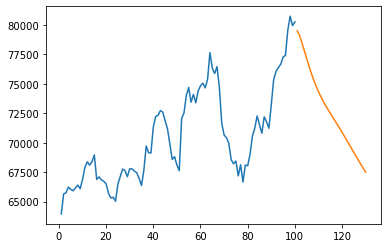

In [52]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

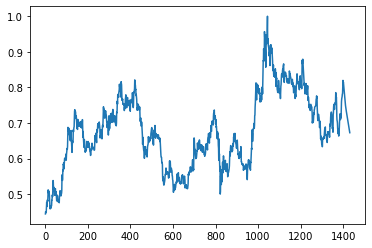

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [54]:
df3=scaler.inverse_transform(df3).tolist()

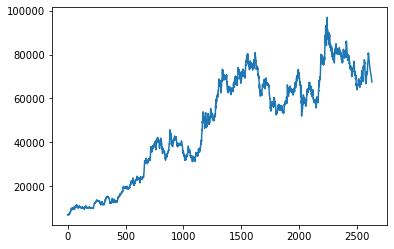

In [55]:
plt.plot(df3)